<a href="https://colab.research.google.com/github/elangbijak4/Quantum_Security_Research/blob/main/BruteForce_use_Gorver_Quantum_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 13.5 MB/s eta

In [3]:
import cirq
import numpy as np

In [4]:
def grover_circuit(num_qubits):
    # Create qubits
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]

    # Create a quantum circuit
    circuit = cirq.Circuit()

    # Initialize qubits to superposition state
    circuit.append([cirq.H(qubit) for qubit in qubits])

    # Oracle to mark the target state
    target_state = [1] * num_qubits  # Target state is |11...1>
    oracle = cirq.Z.controlled(num_qubits - 1)
    circuit.append(oracle(*qubits))

    # Grover diffusion operator (inversion about the mean)
    circuit.append([cirq.H(qubit) for qubit in qubits])
    circuit.append([cirq.X(qubit) for qubit in qubits])
    circuit.append(cirq.Z.controlled(num_qubits - 1)(*qubits))
    circuit.append([cirq.X(qubit) for qubit in qubits])
    circuit.append([cirq.H(qubit) for qubit in qubits])

    return circuit, qubits

In [5]:
# Number of qubits
num_qubits = 3

# Create the Grover circuit
circuit, qubits = grover_circuit(num_qubits)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Get the measurement results
counts = result.histogram(key='result')
print(counts)

# Plot the results
import matplotlib.pyplot as plt

states = [f'{i:03b}' for i in range(2**num_qubits)]
values = [counts.get(i, 0) for i in range(2**num_qubits)]

plt.bar(states, values)
plt.xlabel('State')
plt.ylabel('Counts')
plt.title('Measurement Results')
plt.show()

ValueError: Circuit has no measurements to sample.

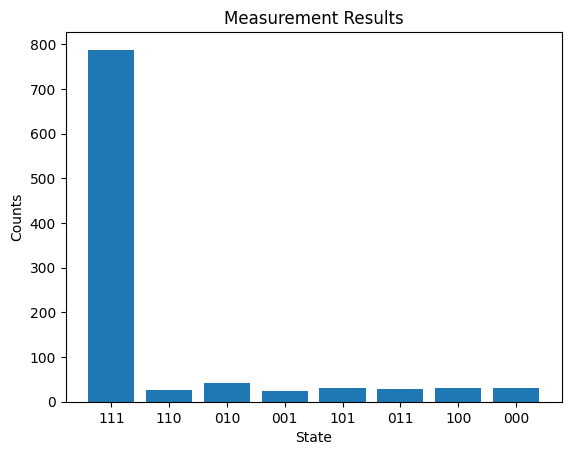

In [7]:
import cirq
import numpy as np

def grover_circuit(num_qubits):
    # Create qubits
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]

    # Create a quantum circuit
    circuit = cirq.Circuit()

    # Initialize qubits to superposition state
    circuit.append([cirq.H(qubit) for qubit in qubits])

    # Oracle to mark the target state
    target_state = [1] * num_qubits  # Target state is |11...1>
    oracle = cirq.Z.controlled(num_qubits - 1)
    circuit.append(oracle(*qubits))

    # Grover diffusion operator (inversion about the mean)
    circuit.append([cirq.H(qubit) for qubit in qubits])
    circuit.append([cirq.X(qubit) for qubit in qubits])
    circuit.append(cirq.Z.controlled(num_qubits - 1)(*qubits))
    circuit.append([cirq.X(qubit) for qubit in qubits])
    circuit.append([cirq.H(qubit) for qubit in qubits])

    # Add measurement
    circuit.append([cirq.measure(qubit, key=f'q{i}') for i, qubit in enumerate(qubits)])

    return circuit, qubits

# Number of qubits
num_qubits = 3

# Create the Grover circuit
circuit, qubits = grover_circuit(num_qubits)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Get the measurement results
keys = [f'q{i}' for i in range(num_qubits)]
counts = result.multi_measurement_histogram(keys=keys)

# Convert the results to a readable format
readable_counts = {"".join(str(bit) for bit in reversed(state)): count for state, count in counts.items()}

# Plot the results
import matplotlib.pyplot as plt

states = list(readable_counts.keys())
values = list(readable_counts.values())

plt.bar(states, values)
plt.xlabel('State')
plt.ylabel('Counts')
plt.title('Measurement Results')
plt.show()